# CIFAR-10

Original data: http://www.cs.toronto.edu/~kriz/cifar.html

In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as pp

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [206]:
FILE = '../../../../../cifar-10-batches-py/data_batch_1'
original = unpickle(FILE)
original_images = original[b'data'].reshape(10000,3,1024)
class_labels = original[b'labels']
filenames = original[b'filenames']
original_images = original_images.transpose(0,2,1)
original_images = original_images.reshape(10000, 32, 32, 3)

# Normalization
scaled = pp.scale(original[b'data'].astype(float), axis=1)
images = scaled.reshape(10000,3,1024)

# Transpose into Keras input tensor shape
images = images.transpose(0,2,1)
images = images.reshape(10000, 32, 32, 3)
images.shape
images[7]

array([[[-1.57884459, -1.46089282, -1.3934918 ],
        [-1.54514408, -1.47774307, -1.30924054],
        [-1.49459332, -1.30924054, -1.25868978],
        ...,
        [-1.32609079, -1.1070375 , -1.29239028],
        [-1.17443851, -0.97223547, -1.15758826],
        [-1.27554003, -1.07333699, -1.25868978]],

       [[-1.59569484, -1.54514408, -1.41034206],
        [-1.59569484, -1.57884459, -1.3597913 ],
        [-1.69679636, -1.52829383, -1.3934918 ],
        ...,
        [-0.16342332,  0.24098275, -0.41617712],
        [-0.07917206,  0.30838377, -0.34877611],
        [-0.11287256,  0.27468326, -0.36562636]],

       [[-1.47774307, -1.44404256, -1.34294104],
        [-1.49459332, -1.49459332, -1.32609079],
        [-1.6462456 , -1.54514408, -1.37664155],
        ...,
        [ 0.89814263,  1.45420098,  0.35893453],
        [ 0.93184314,  1.47105124,  0.37578478],
        [ 0.91499288,  1.45420098,  0.35893453]],

       ...,

       [[ 0.34208427,  0.91499288, -0.0623218 ],
        [ 0

## Pick up one sample and show the image

In [207]:
red = original_images[7,:,:,0]
green = original_images[7,:,:,1]
blue = original_images[7,:,:,2]

import numpy as np
img = np.dstack((red, green ,blue))

(b'cow_pony_s_001168.png', 7)

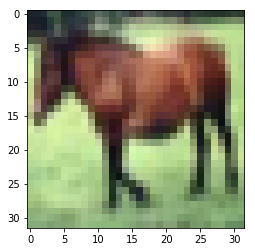

In [208]:
plt.imshow(img)
filenames[7], class_labels[7]

## Prepare input data for Keras 

In [228]:
from keras.utils import to_categorical

FILES = 2000
TRAINING_FILES = 1400 
TEST_FILES = FILES - TRAINING_FILES
NUM_CLASSES = 10

train_data = images[:TRAINING_FILES]
test_data = images[TRAINING_FILES:FILES]

train_labels=to_categorical(class_labels[:TRAINING_FILES])
test_labels=to_categorical(class_labels[TRAINING_FILES:FILES])

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((1400, 32, 32, 3), (600, 32, 32, 3), (1400, 10), (600, 10))

## CNN model

In [229]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 512)               0         
__________

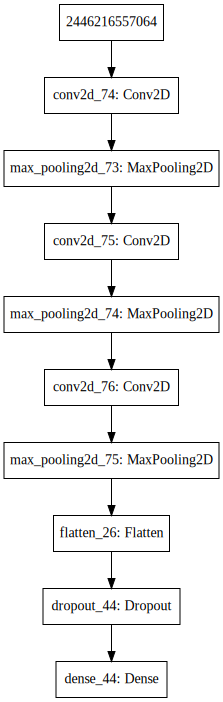

In [230]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [231]:
EPOCHS = 100
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 1400 samples, validate on 600 samples
Epoch 1/100
1400/1400 [==============================] - 48s 35ms/step - loss: 2.2326 - acc: 0.1636 - val_loss: 2.0961 - val_acc: 0.2433
Epoch 2/100
1400/1400 [==============================] - 46s 33ms/step - loss: 2.0061 - acc: 0.2686 - val_loss: 1.9643 - val_acc: 0.2833
Epoch 3/100
1400/1400 [==============================] - 45s 32ms/step - loss: 1.8913 - acc: 0.2914 - val_loss: 1.8865 - val_acc: 0.3133
Epoch 4/100
1400/1400 [==============================] - 45s 32ms/step - loss: 1.8411 - acc: 0.3129 - val_loss: 1.8460 - val_acc: 0.3383
Epoch 5/100
1400/1400 [==============================] - 45s 32ms/step - loss: 1.7409 - acc: 0.3550 - val_loss: 1.7967 - val_acc: 0.3567
Epoch 6/100
1400/1400 [==============================] - 47s 33ms/step - loss: 1.6965 - acc: 0.3779 - val_loss: 1.7877 - val_acc: 0.3483
Epoch 7/100
1400/1400 [==============================] - 45s 32ms/step - loss: 1.6498 - acc: 0.3943 - val_loss: 1.7969 - val_acc: 0

KeyboardInterrupt: 